In [8]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D, Flatten, Dense
import numpy as np

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x = x_test

9


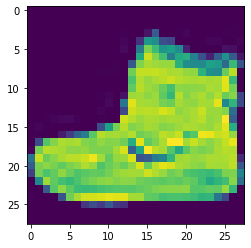

0


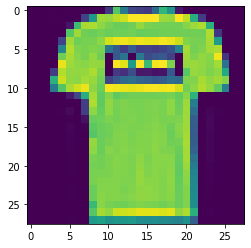

0


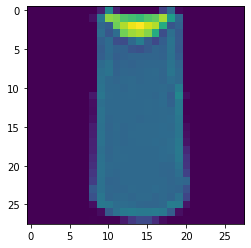

3


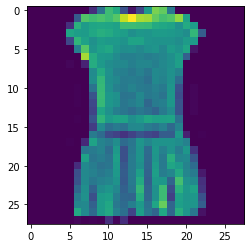

0


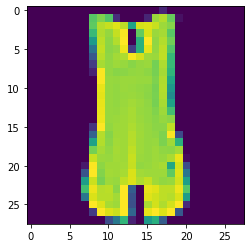

2


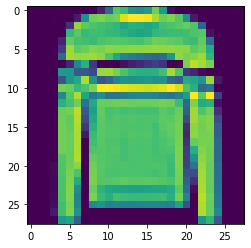

7


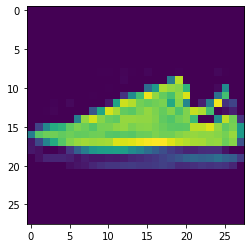

2


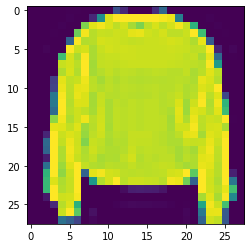

5


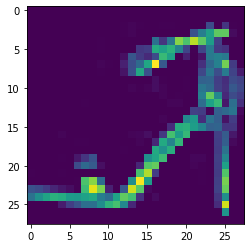

In [9]:
for i in range(9):
  plt.imshow(x_train[i])
  print(y_train[i])
  plt.show()

In [10]:
classes = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
# MODEL CNN
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D

model = Sequential()
# BLOCK 1
model.add(Conv2D(28,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(28,28,1)))
model.add(Conv2D(28,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(56,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(56,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 3
model.add(Conv2D(112,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(112,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

#output
model.add(Flatten())
model.add(Dense(112, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(112, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [13]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
history = model.fit(x_train,y_train, batch_size=64, epochs=50, verbose=1, validation_data=(x_test,y_test))

Epoch 1/50
938/938 [==============================] - 7s 7ms/step - loss: 0.5252 - accuracy: 0.8075 - val_loss: 0.3880 - val_accuracy: 0.8466
Epoch 2/50
938/938 [==============================] - 6s 7ms/step - loss: 0.3136 - accuracy: 0.8854 - val_loss: 0.2969 - val_accuracy: 0.8894
Epoch 3/50
938/938 [==============================] - 8s 8ms/step - loss: 0.2646 - accuracy: 0.9028 - val_loss: 0.2848 - val_accuracy: 0.8996
Epoch 4/50
938/938 [==============================] - 8s 8ms/step - loss: 0.2321 - accuracy: 0.9145 - val_loss: 0.2505 - val_accuracy: 0.9103
Epoch 5/50
938/938 [==============================] - 7s 8ms/step - loss: 0.2066 - accuracy: 0.9244 - val_loss: 0.2584 - val_accuracy: 0.9083
Epoch 6/50
938/938 [==============================] - 7s 7ms/step - loss: 0.1855 - accuracy: 0.9312 - val_loss: 0.2567 - val_accuracy: 0.9068
Epoch 7/50
938/938 [==============================] - 6s 7ms/step - loss: 0.1676 - accuracy: 0.9366 - val_loss: 0.2400 - val_accuracy: 0.9182
Epoch 

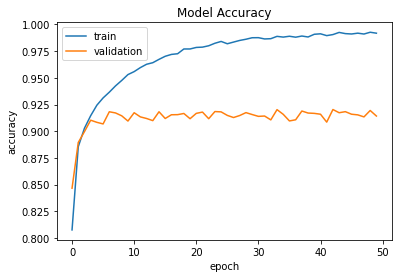

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

In [16]:
y_predict = model.predict(x_test)

# Tạo một index và dự đoán 
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_classes = y_predict[random_index]

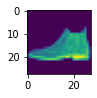

ankle boot


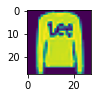

pullover


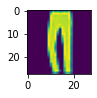

trouser


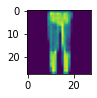

trouser


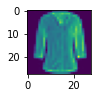

shirt


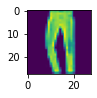

trouser


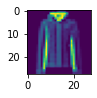

coat


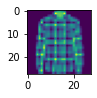

shirt


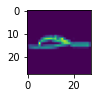

sandal


In [18]:
for i in range(9):
    plt.subplot(330+i+1) # 3 hàng, 3 cột
    plt.imshow(x[i])
    plt.show()
    #print(np.round(y_predict[i]))
    print(classes[np.argmax(y_predict[i])])

In [19]:
model.save('fashion_mnist(CNN).h5')